In [1]:
import os
os.chdir('D:\\ARSYAD')
os.getcwd()

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [2]:
diabetes_df = pd.read_csv('diabetes_v2.csv')
diabetes_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [3]:
diabetes_df = diabetes_df[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']]
diabetes_df['Gender'] = diabetes_df['Gender'].astype('category')

In [4]:
diabetes_df.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

Accuracy: 0.9842


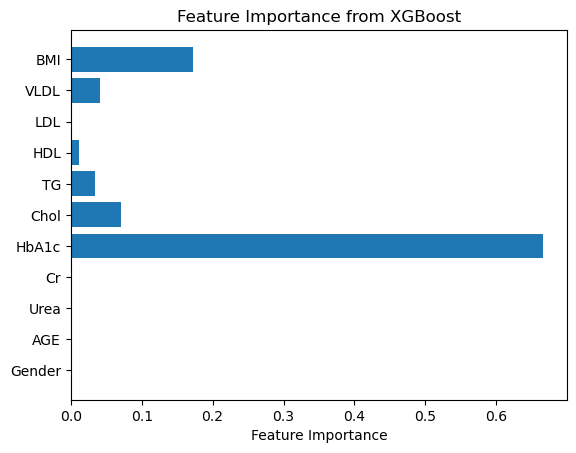

In [5]:
X = diabetes_df.drop('CLASS', axis=1)  # Features
y = diabetes_df['CLASS']  # Target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', enable_categorical=True)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Step 6: Extract feature importance
importances = model.feature_importances_

# Step 7: Plot feature importance
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()


<h1 style="font-size:30px;">Membership of HbA1c (Hemoglobin)</h1>


C:\Users\HP VICTUS\miniconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


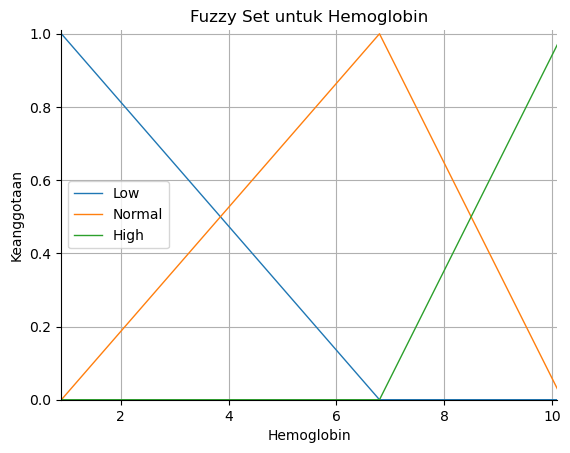

In [6]:
hemoglobin = ctrl.Antecedent(np.arange(0.9, 10.2, 0.1),'hemoglobin')


hemoglobin['Low'] = fuzz.trimf(hemoglobin.universe, [0.9, 0.9, 6.8])
hemoglobin['Normal'] = fuzz.trimf(hemoglobin.universe, [0.9, 6.8, 10.2])
hemoglobin['High'] = fuzz.trimf(hemoglobin.universe, [6.8, 10.2, 10.2])

hemoglobin.view()


plt.title('Fuzzy Set untuk Hemoglobin')
plt.xlabel('Hemoglobin')
plt.ylabel('Keanggotaan')
plt.grid(True)

plt.legend(['Low', 'Normal', 'High'])

plt.show()

<h1 style="font-size:30px;">Membership of BMI (Badan Massa Index)</h1>


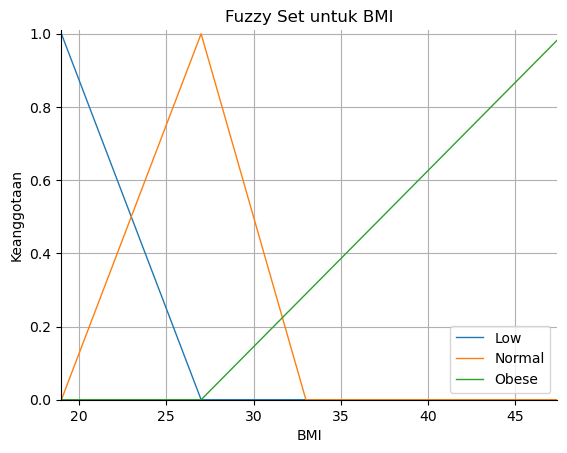

In [7]:
bmi = ctrl.Antecedent(np.arange(19.0, 47.5, 0.1),'bmi')

bmi['Low'] = fuzz.trimf(bmi.universe, [19.0, 19.0, 27.0])
bmi['Normal'] = fuzz.trimf(bmi.universe, [19.0, 27.0, 33.0])
bmi['Obese'] = fuzz.trimf(bmi.universe, [27.0, 47.75,47.75 ])

bmi.view()


plt.title('Fuzzy Set untuk BMI')
plt.xlabel('BMI')
plt.ylabel('Keanggotaan')
plt.grid(True)

plt.legend(['Low', 'Normal', 'Obese'])

plt.show()

<h1 style="font-size:30px;">Membership of Cholestrol</h1>


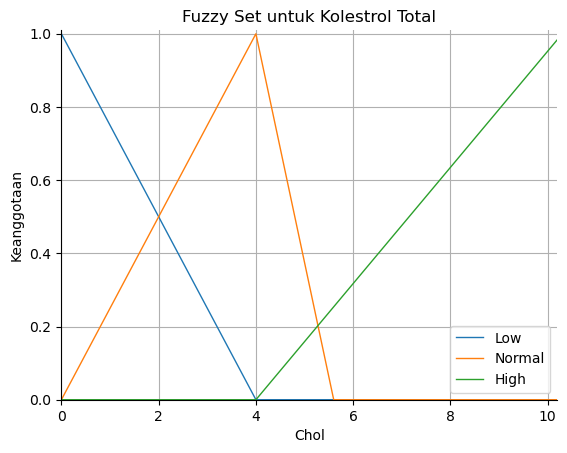

In [8]:
chol = ctrl.Antecedent(np.arange(0.0, 10.3, 0.1),'chol')


chol['Low'] = fuzz.trimf(chol.universe, [0.0, 0.0, 4.0])
chol['Normal'] = fuzz.trimf(chol.universe, [0.0, 4.0, 5.6])
chol['High'] = fuzz.trimf(chol.universe, [4.0 ,10.3, 10.3])

chol.view()


plt.title('Fuzzy Set untuk Kolestrol Total')
plt.xlabel('Chol')
plt.ylabel('Keanggotaan')
plt.grid(True)

plt.legend(['Low', 'Normal', 'High'])

plt.show()

<h1 style="font-size:30px;">Variabel Output (Qonsequent)</h1>


In [9]:
isDiabetes = ctrl.Consequent(np.arange(0, 2, 1), 'Diabetes') 

isDiabetes['no'] = fuzz.trimf(isDiabetes.universe, [0, 0, 1])  # Tidak diabetes
isDiabetes['yes'] = fuzz.trimf(isDiabetes.universe, [0, 1, 1])  # Diabetes

<h1 style="font-size:30px;">Rule of Fuzzy</h1>


In [10]:
rule1 = ctrl.Rule(hemoglobin['High'] & chol['High'] | bmi['Obese'], isDiabetes['yes'])
rule2 = ctrl.Rule(hemoglobin['Normal'] & chol['Normal'] & bmi['Normal'], isDiabetes['no'])
rule3 = ctrl.Rule(hemoglobin['High'] & chol['Normal'] & bmi['Obese'], isDiabetes['yes'])
rule4 = ctrl.Rule(hemoglobin['Low'] & chol['Low'] & bmi['Low'], isDiabetes['no'])
rule5 = ctrl.Rule(hemoglobin['Normal'] & chol['High'] | bmi['Obese'], isDiabetes['yes'])
rule6 = ctrl.Rule(hemoglobin['Low'] & chol['Normal'] | bmi['Obese'], isDiabetes['no'])
rule7 = ctrl.Rule(hemoglobin['Normal'] & chol['High'] | bmi['Normal'], isDiabetes['yes'])

In [11]:
diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
diabetes_sim = ctrl.ControlSystemSimulation(diabetes_ctrl)


In [12]:
ctrl.ControlSystemSimulation(diabetes_ctrl).input

hemoglobin : None
chol : None
bmi : None

<h1 style="font-size:30px;">Input provision and Fuzzy calculation</h1>

μ_no = 0.66
μ_yes = 0.34
Hasil fuzzy: 0.34
Diagnosis diabetes: no


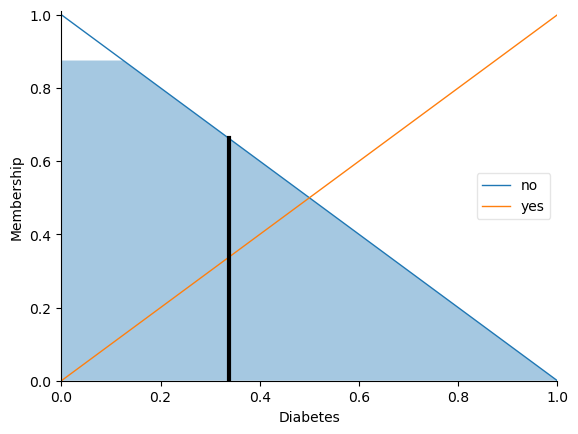

In [13]:
diabetes_sim.input['hemoglobin'] = 0.9
diabetes_sim.input['chol'] = 0.5
diabetes_sim.input['bmi'] =19.0
diabetes_sim.compute()
isDiabetes.view(sim=diabetes_sim)


# Dapatkan output fuzzy
result = diabetes_sim.output['Diabetes']
miu_no = max(0, 1 - result)  # Linear turun dari 1 ke 0
miu_yes = max(0, result)     # Linear naik dari 0 ke 1

# Ambang batas untuk klasifikasi
threshold = 0.5

# Konversi ke 'yes' atau 'no'
diagnosis = 'yes' if result > threshold else 'no'

print(f"μ_no = {miu_no:.2f}")
print(f"μ_yes = {miu_yes:.2f}")
print(f"Hasil fuzzy: {result:.2f}")
print(f"Diagnosis diabetes: {diagnosis}")

μ_no = 0.43
μ_yes = 0.57
Hasil fuzzy: 0.57
Diagnosis diabetes: yes


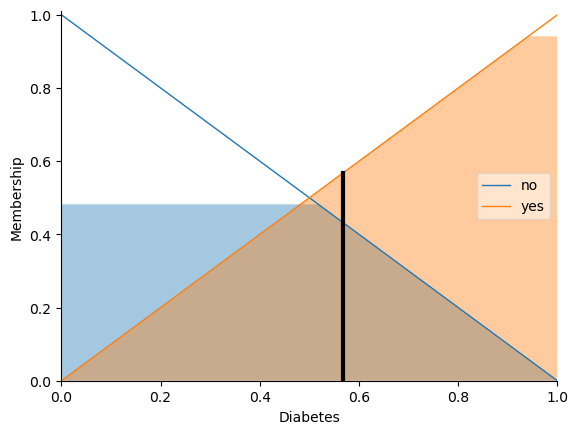

In [14]:
diabetes_sim.input['hemoglobin'] = 10.0
diabetes_sim.input['chol'] = 10.0
diabetes_sim.input['bmi'] = 37.0
diabetes_sim.compute()
isDiabetes.view(sim=diabetes_sim)


# Dapatkan output fuzzy
result = diabetes_sim.output['Diabetes']
miu_no = max(0, 1 - result)  # Linear turun dari 1 ke 0
miu_yes = max(0, result)     # Linear naik dari 0 ke 1

# Ambang batas untuk klasifikasi
threshold = 0.5

# Konversi ke 'yes' atau 'no'
diagnosis = 'yes' if result > threshold else 'no'

print(f"μ_no = {miu_no:.2f}")
print(f"μ_yes = {miu_yes:.2f}")
print(f"Hasil fuzzy: {result:.2f}")
print(f"Diagnosis diabetes: {diagnosis}")

<h1 style="font-size:30px;">Fuzzy Model Accuracy</h1>

Akurasi sistem fuzzy: 67.48%
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.73      0.33       103
           1       0.95      0.67      0.79       844

    accuracy                           0.67       947
   macro avg       0.58      0.70      0.56       947
weighted avg       0.87      0.67      0.74       947



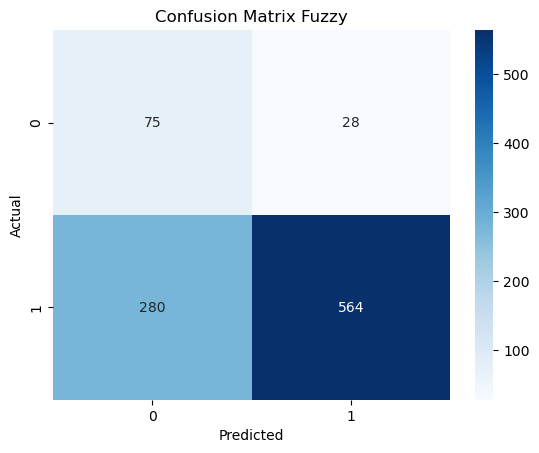

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Baca dataset dari file CSV
df = pd.read_csv('diabetes_v2.csv')

y_true = []
y_pred = []

for index, row in df.iterrows():
    hgb = row['HbA1c']
    chol = row['Chol']
    bmi = row['BMI']
    label = row['CLASS']

    diabetes_sim.input['hemoglobin'] = hgb
    diabetes_sim.input['chol'] = chol
    diabetes_sim.input['bmi'] = bmi
    diabetes_sim.compute()

    result = diabetes_sim.output['Diabetes']
    pred = 1 if result > 0.5 else 0

    y_true.append(label)
    y_pred.append(pred)

akurasi = accuracy_score(y_true, y_pred)
print(f"Akurasi sistem fuzzy: {akurasi * 100:.2f}%")

# Laporan klasifikasi
print("Classification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Fuzzy')
plt.show()

In [ ]:
#Decision Tree

In [16]:
#Import library yang dibutuhkan untuk membangun model Decision Tree
import os
os.chdir('D:\\ARSYAD')
os.getcwd()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#load Dataset
data= pd.read_csv('diabetes_v2.csv')
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [18]:
#Pilih fitur sesuai yang digunakan pada model fuzzy
X = data[['HbA1c', 'BMI', 'Chol']]  # Fitur
y = data['CLASS']  # Label target (1 = diabetes, 0 = tidak)

#latih data dan lakukan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% latih, 20% tes
)

#Bangun model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Akurasi Model Decision Tree: 98.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.99      0.99      0.99       170

    accuracy                           0.98       190
   macro avg       0.95      0.97      0.96       190
weighted avg       0.98      0.98      0.98       190



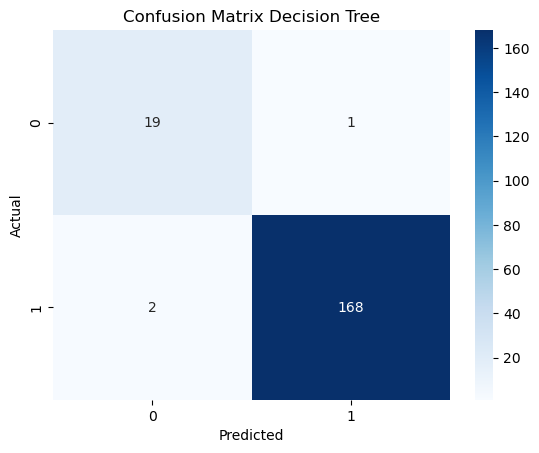

In [19]:
y_pred = model.predict(X_test)

# Akurasi
print(f"Akurasi Model Decision Tree: {accuracy_score(y_test, y_pred) * 100:.2f}%")


# Laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

<h1 style="font-size:30px;">Visualization Decision Tree</h1>

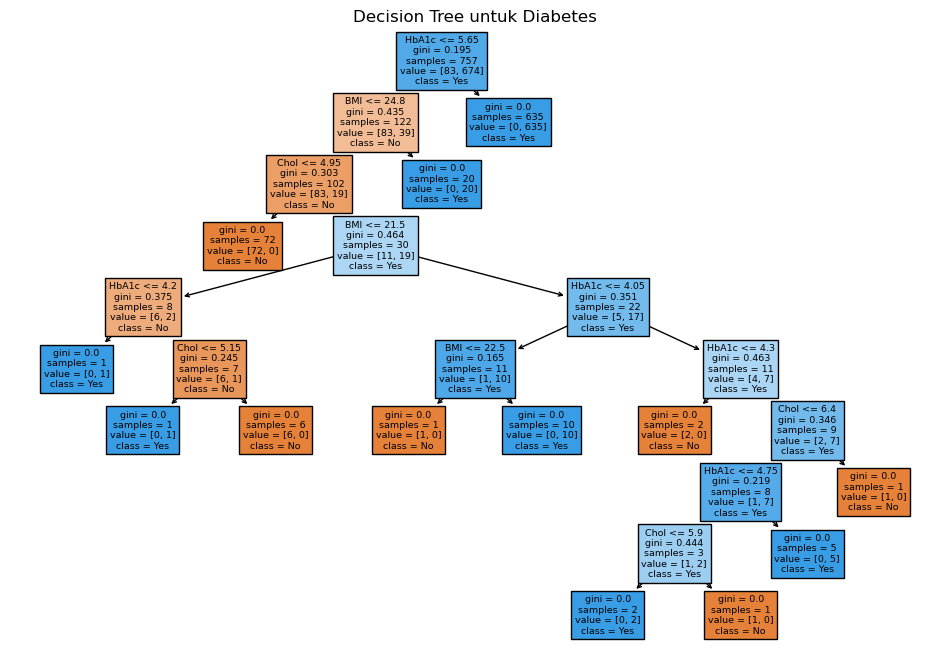

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['HbA1c', 'BMI', 'Chol'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree untuk Diabetes")
plt.show()